In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

Data Pre-Processing

In [8]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [9]:
validation_set = image_dataset_from_directory(
    "./val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [12]:
INPUT_SHAPE = (224,224,3)

In [13]:
mobilenet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [14]:
model = tf.keras.models.Sequential()

In [15]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [16]:
model.add(mobilenet)

In [17]:
model.add(tf.keras.layers.Dense(units = 4, activation="softmax"))

In [18]:
metrics_list = ["accuracy",tf.keras.metrics.F1Score()]

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=metrics_list)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [49]:
from sklearn.utils import compute_class_weight
import numpy as np

print("Calculating class weights...")

# Get all labels from your training_set
y_train_labels = np.concatenate([y for x, y in training_set], axis=0)

# Convert from one-hot encoding to class indices
y_train_indices = np.argmax(y_train_labels, axis=1)

# Get the unique class numbers
classes = np.unique(y_train_indices)

# Calculate the weights
weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_indices
)

# Create the dictionary Keras needs
class_weights_dict = dict(zip(classes, weights))

print("Class weights calculated:")
print(class_weights_dict)

Calculating class weights...
Class weights calculated:
{np.int64(0): np.float64(0.7296037073766115), np.int64(1): np.float64(2.356337767923134), np.int64(2): np.float64(3.082299387689333), np.int64(3): np.float64(0.5317529814027188)}


2025-10-30 04:57:11.549055: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [50]:
training_history = model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=15,
    class_weight=class_weights_dict  # <-- This is the new part you must add
)

Epoch 1/15


2025-10-30 04:58:48.256180: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 04:58:48.384955: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 04:58:49.435941: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 04:58:49.531709: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 04:58:49.628651: E external/local_xla/xla/stream_

2390/2392 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8274 - f1_score: 0.6144 - loss: 1.0353

2025-10-30 05:00:18.155282: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:18.279394: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:18.415429: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:18.559053: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:18.705701: E external/local_xla/xla/stream_

2392/2392 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8275 - f1_score: 0.6144 - loss: 1.0352

2025-10-30 05:00:43.059829: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:43.183623: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:43.589743: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:43.733604: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-10-30 05:00:43.877470: E external/local_xla/xla/stream_

2392/2392 ━━━━━━━━━━━━━━━━━━━━ 125s 43ms/step - accuracy: 0.8468 - f1_score: 0.6381 - loss: 0.8590 - val_accuracy: 0.7845 - val_f1_score: 0.5871 - val_loss: 0.8688
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.8771 - f1_score: 0.6934 - loss: 0.5830 - val_accuracy: 0.8276 - val_f1_score: 0.6510 - val_loss: 0.6384
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.9112 - f1_score: 0.8453 - loss: 0.3990 - val_accuracy: 0.8963 - val_f1_score: 0.8476 - val_loss: 0.4177
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.9481 - f1_score: 0.9155 - loss: 0.2254 - val_accuracy: 0.8872 - val_f1_score: 0.7915 - val_loss: 0.4715
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.9561 - f1_score: 0.9283 - loss: 0.1839 - val_accuracy: 0.8955 - val_f1_score: 0.7977 - val_loss: 0.5360
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - accuracy: 0.9613 - f1_score: 0.9361 - loss: 0.1628 - val_accuracy: 0.9613 - val_f1

In [51]:
model.save("./Trained_Eye_disease_model.h5")
model.save("./Trained_Eye_disease_model.keras")

In [52]:
training_history.history

{'accuracy': [0.846788227558136,
  0.8770829439163208,
  0.9111807942390442,
  0.9481016993522644,
  0.9561131596565247,
  0.9612886309623718,
  0.964529812335968,
  0.9660981297492981,
  0.9666339755058289,
  0.9671044945716858,
  0.967771053314209,
  0.966359555721283,
  0.9680977463722229,
  0.9702149629592896,
  0.9708423018455505],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.85529935, 0.7570376 , 0.00315606, 0.9370049 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8751157 , 0.8657191 , 0.06805854, 0.96483123], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9070056 , 0.904035  , 0.59792197, 0.97242707], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9523921, 0.9304588, 0.8012921, 0.9778413], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96141195, 0.93897444, 0.83269095, 0.9801043 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array(

In [53]:
#Saving History
import pickle
with open("Training_history.pkl","wb") as f:
    pickle.dump(training_history.history,f)

In [54]:
#Reloading History from pickle file
import pickle
with open("Training_history.pkl","rb") as f:
    load_history = pickle.load(f)
print(load_history)

{'accuracy': [0.846788227558136, 0.8770829439163208, 0.9111807942390442, 0.9481016993522644, 0.9561131596565247, 0.9612886309623718, 0.964529812335968, 0.9660981297492981, 0.9666339755058289, 0.9671044945716858, 0.967771053314209, 0.966359555721283, 0.9680977463722229, 0.9702149629592896, 0.9708423018455505], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.85529935, 0.7570376 , 0.00315606, 0.9370049 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8751157 , 0.8657191 , 0.06805854, 0.96483123], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9070056 , 0.904035  , 0.59792197, 0.97242707], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9523921, 0.9304588, 0.8012921, 0.9778413], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.96141195, 0.93897444, 0.83269095, 0.9801043 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9664718 , 0.94605505, 0.84962505, 0.

In [55]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

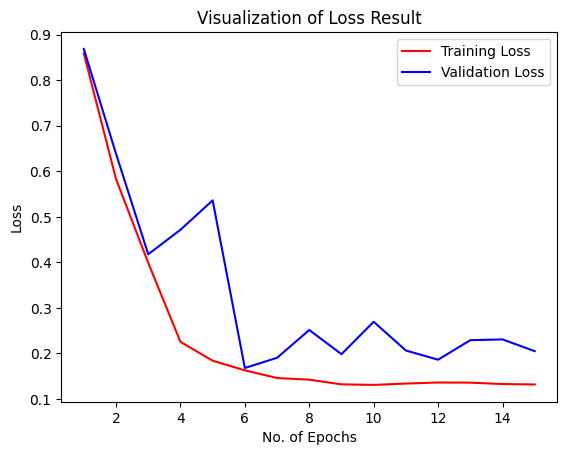

In [56]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red', label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue', label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

Model Evaluation

In [57]:
model = tf.keras.models.load_model("Trained_Eye_disease_model.keras")

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,998,474 (41.96 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,487,038 (20.93 MB)

In [59]:
test_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [60]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9577 - f1_score: 0.9255 - loss: 0.2080


In [61]:
test_loss,test_acc,f1_score

(0.20800034701824188,
 0.9577426314353943,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9665299, 0.9128297, 0.842985 , 0.9795093], dtype=float32)>)

In [62]:
#Computing True Label from test set
true_categories = tf.concat([y for x,y in test_set], axis=0)
Y_true = tf.argmax(true_categories,axis=1)

In [63]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(10933, 4), dtype=float32)>

In [64]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

In [65]:
#Computing Predicted labels using test_set
predicted_categories = model.predict(test_set)
predicted_categories

342/342 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


array([[9.9294668e-01, 3.7153080e-04, 6.6540665e-03, 2.7721097e-05],
       [9.9294668e-01, 3.7153080e-04, 6.6540665e-03, 2.7721097e-05],
       [9.9294668e-01, 3.7153080e-04, 6.6540665e-03, 2.7721097e-05],
       ...,
       [1.6028065e-05, 1.2290656e-03, 8.5364077e-03, 9.9021846e-01],
       [1.6028065e-05, 1.2290656e-03, 8.5364077e-03, 9.9021846e-01],
       [1.6028065e-05, 1.2290656e-03, 8.5364077e-03, 9.9021846e-01]],
      shape=(10933, 4), dtype=float32)

In [66]:
Y_pred = tf.argmax(predicted_categories,axis=1)
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

1. Classification Report


In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3746
           1       0.95      0.88      0.91      1161
           2       0.90      0.80      0.84       887
           3       0.97      0.99      0.98      5139

    accuracy                           0.96     10933
   macro avg       0.94      0.91      0.93     10933
weighted avg       0.96      0.96      0.96     10933



2. Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3653,   40,   43,   10],
       [  35, 1021,   10,   95],
       [ 116,    5,  706,   60],
       [   9,   10,   29, 5091]])

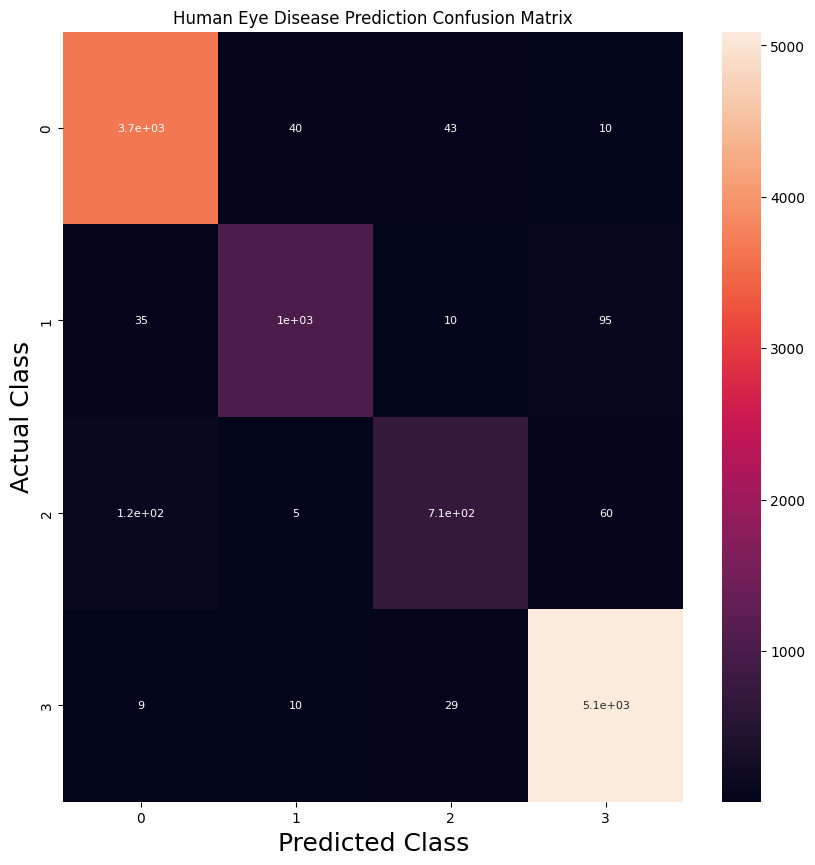

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=18)
plt.ylabel("Actual Class",fontsize=18)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()